In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

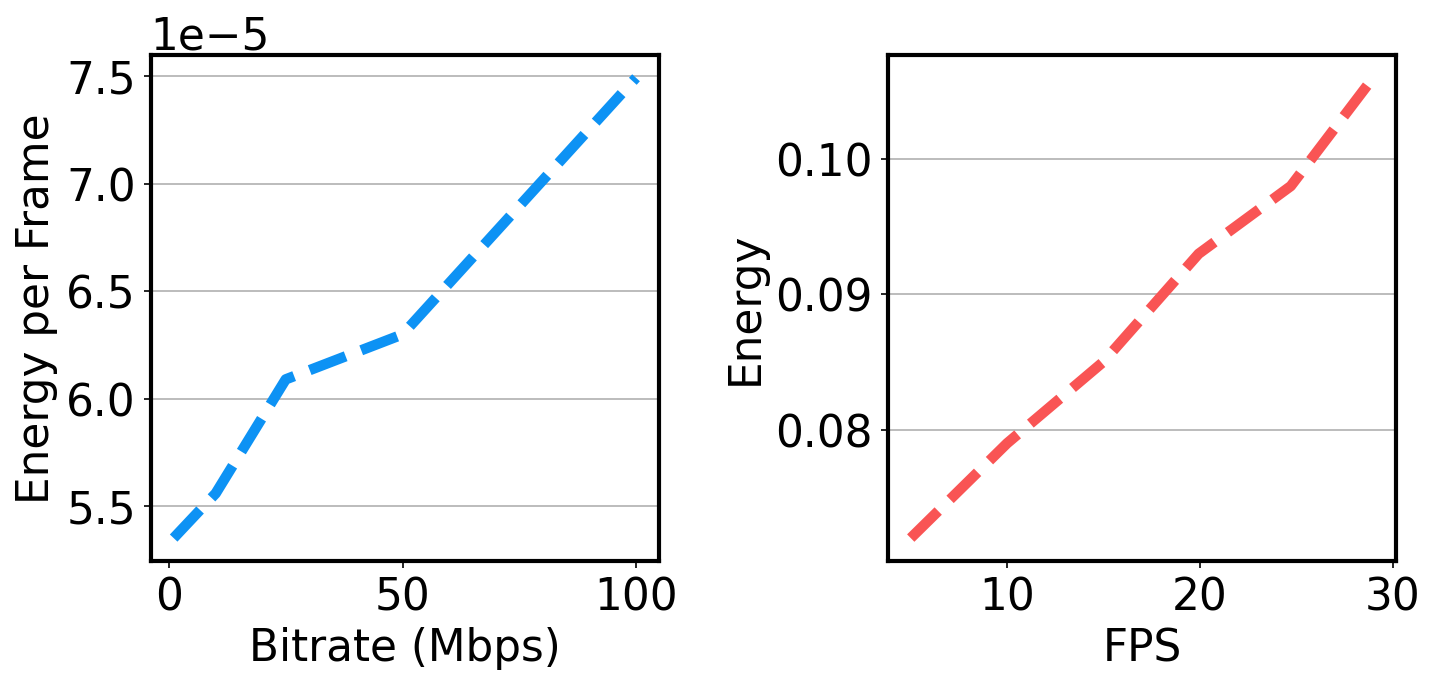

In [49]:
plt.rcParams['figure.dpi'] = 150  # plt.show display resolution
font = {'family': 'sans-serif',
        'serif': 'Helvetica',
        'weight': 'normal',
        'size': 21}
plt.rc('font', **font)
plt.rcParams['axes.linewidth'] = 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

colors = ['#0D92F4', '#F95454']

# H264 Bitrate to energy
bitrate_energy = [0.096, 0.099, 0.104, 0.109, 0.104]
bitrate_energy_fps = [0.096 / 29.899, 0.099 / 29.681, 0.104 / 28.464, 0.109 / 28.842, 0.104 / 23.135]
for i in range(len(bitrate_energy_fps)):
    bitrate_energy_fps[i] = bitrate_energy_fps[i] / 60 # Convert to energy / frame instead of energy / fps
bitrates = [1, 10, 25, 50, 100]

ax1.plot(bitrates, bitrate_energy_fps, '--', color=colors[0], linewidth=5)
# ax1.set_title('H264 Encoding Bitrate vs. Energy')
ax1.set_xlabel('Bitrate (Mbps)')
ax1.set_ylabel('Energy per Frame')
ax1.grid(True, axis='y')


# FPS to Energy
fps = [4.99, 9.99, 14.97, 19.93, 24.71, 28.98]
encoding_energy_2_4ghz = [0.072, 0.079, 0.085, 0.093, 0.098, 0.106]
ax2.plot(fps, encoding_energy_2_4ghz, '--', color=colors[1], linewidth=5)
# ax2.set_title('FPS vs. Energy During Video Stream')
ax2.set_xlabel('FPS')
ax2.set_ylabel('Energy')
ax2.grid(True, axis='y')

labels = [r'(a)', r'(b)']
positions = [(0.5, -0.15)] * 4  # Centered below each subplot

# Add labels below each subplot
# for ax, label, pos in zip([ax1,ax2], labels, positions):
#     ax.text(pos[0], pos[1], label, transform=ax.transAxes, weight='bold', fontsize=14, ha='center', va='top')

plt.tight_layout()
plt.show()

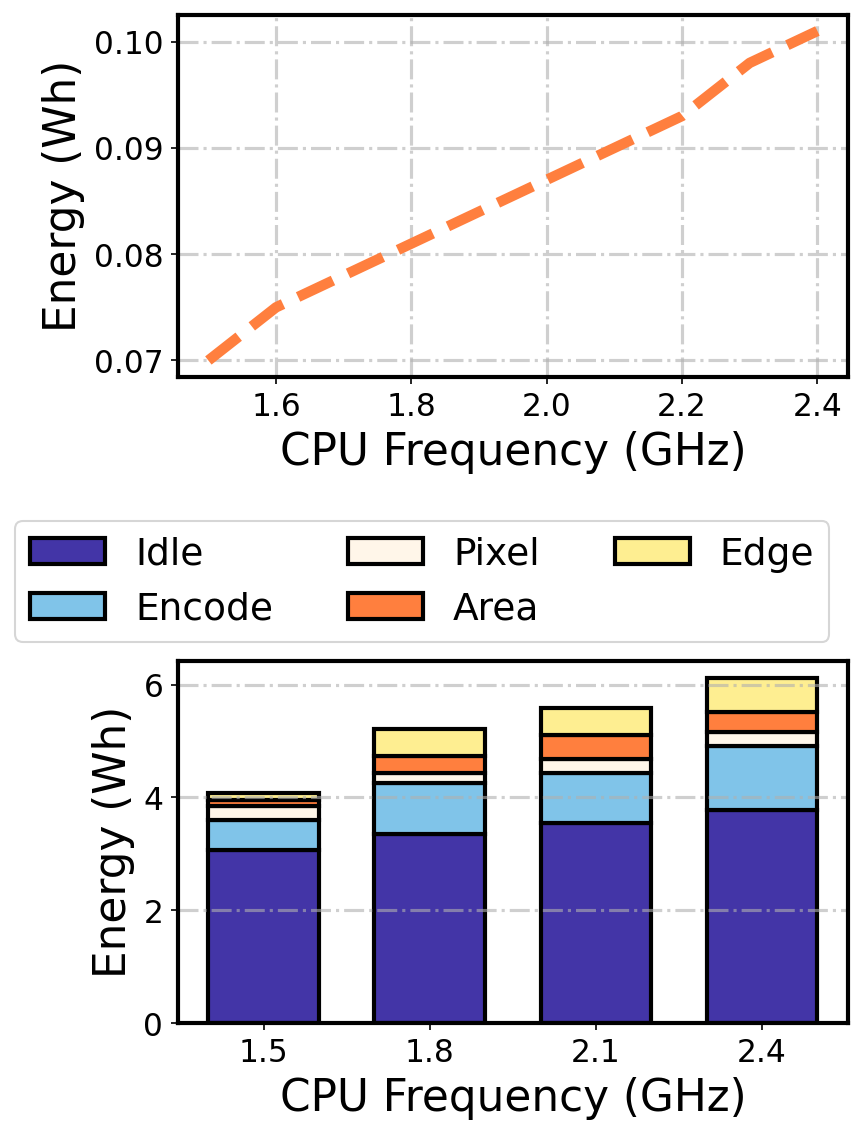

In [50]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8))

# Set a professional color palette
colors = ['#4335A7', '#80C4E9', '#FFF6E9', '#FF7F3E', '#FEEE91']
# colors = ['#7695FF', '#FF6600', '#F5F5F5', '#179BAE', '#A459D1']

# CPU Frequency vs. Energy Line Plot
cpu_freq = [1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4]
energy = [0.070, 0.075, 0.078, 0.081, 0.084, 0.087, 0.090, 0.093, 0.098, 0.101]

ax1.plot(cpu_freq, energy, linestyle='--', linewidth=5, color=colors[3], markersize=8)
# ax1.set_title('Energy Consumption During 60s Video Stream', fontsize=14, fontweight='bold')
ax1.set_xlabel('CPU Frequency (GHz)')
ax1.set_ylabel('Energy (Wh)')
ax1.tick_params(axis='both', labelsize=15)
ax1.grid(True, linestyle='-.', linewidth=1.5, alpha=0.6)

# CPU Frequency vs. Stacked Energy Bar Graph
cpu_freq = np.array([1.5, 1.8, 2.1, 2.4])
idle_energy = np.array([0.051, 0.056, 0.059, 0.063]) * 60
encode_energy = np.array([0.06, 0.071, 0.074, 0.082]) * 60
pixel_encode_energy = np.array([0.064, 0.074, 0.078, 0.086]) * 60
area_encode_energy = np.array([0.066, 0.079, 0.085, 0.092]) * 60
edge_encode_energy = np.array([0.068, 0.087, 0.093, 0.102]) * 60

bar_width = 0.2
linewidth = 2
ax2.bar(cpu_freq, idle_energy, width=bar_width, label='Idle', color=colors[0], edgecolor='black', linewidth=linewidth)
ax2.bar(cpu_freq, encode_energy - idle_energy, width=bar_width, bottom=idle_energy, label='Encode', color=colors[1], edgecolor='black', linewidth=linewidth)
ax2.bar(cpu_freq, pixel_encode_energy - encode_energy, width=bar_width, bottom=encode_energy, label='Pixel', color=colors[2], edgecolor='black', linewidth=linewidth)
ax2.bar(cpu_freq, area_encode_energy - pixel_encode_energy, width=bar_width, bottom=pixel_encode_energy, label='Area', color=colors[3], edgecolor='black', linewidth=linewidth)
ax2.bar(cpu_freq, edge_encode_energy - area_encode_energy, width=bar_width, bottom=area_encode_energy, label='Edge', color=colors[4], edgecolor='black', linewidth=linewidth)

ax2.set_xticks(cpu_freq)
# ax2.set_title('CPU Frequency vs. Energy Breakdown', fontsize=14, fontweight='bold')
ax2.set_xlabel('CPU Frequency (GHz)')
ax2.set_ylabel('Energy (Wh)')
ax2.tick_params(axis='both', labelsize=15)
ax2.grid(True, axis='y', linestyle='-.', linewidth=1.5, alpha=0.6)
ax2.legend(fontsize=18, loc='lower right', bbox_to_anchor=(1, 1), ncol=3)

plt.tight_layout()
plt.show()

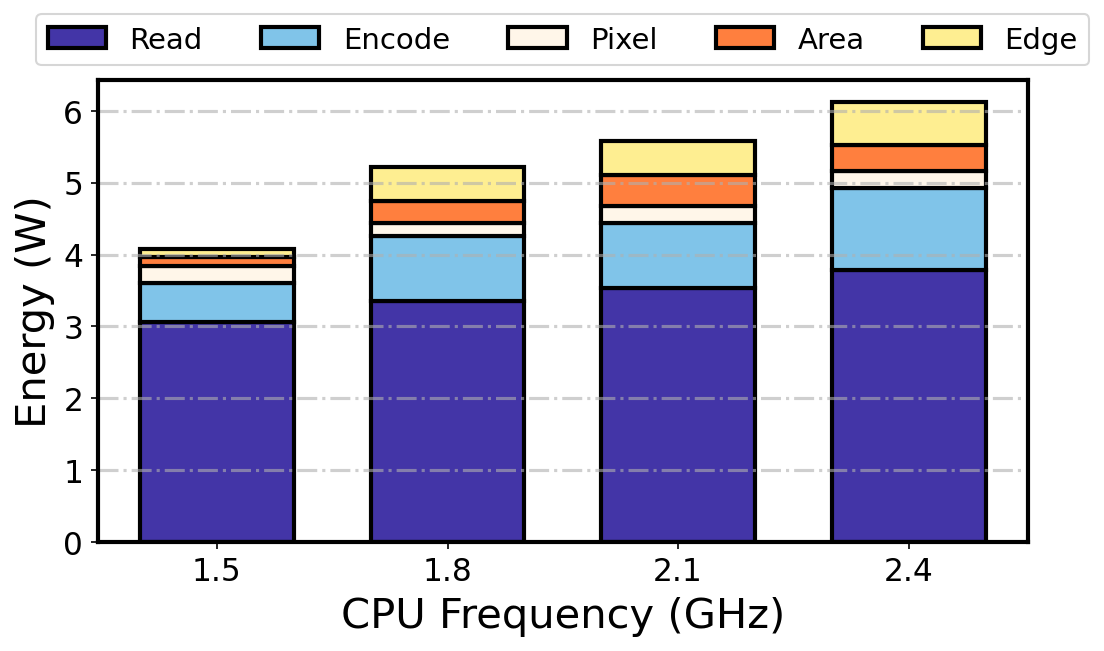

In [51]:
fig, ax2 = plt.subplots(figsize=(8, 4))

# CPU Frequency vs. Stacked Energy Bar Graph
cpu_freq = np.array([1.5, 1.8, 2.1, 2.4])
idle_energy = np.array([0.051, 0.056, 0.059, 0.063]) * 60
encode_energy = np.array([0.06, 0.071, 0.074, 0.082]) * 60
pixel_encode_energy = np.array([0.064, 0.074, 0.078, 0.086]) * 60
area_encode_energy = np.array([0.066, 0.079, 0.085, 0.092]) * 60
edge_encode_energy = np.array([0.068, 0.087, 0.093, 0.102]) * 60

bar_width = 0.2
linewidth = 2
ax2.bar(cpu_freq, idle_energy, width=bar_width, label='Read', color=colors[0], edgecolor='black', linewidth=linewidth)
ax2.bar(cpu_freq, encode_energy - idle_energy, width=bar_width, bottom=idle_energy, label='Encode', color=colors[1], edgecolor='black', linewidth=linewidth)
ax2.bar(cpu_freq, pixel_encode_energy - encode_energy, width=bar_width, bottom=encode_energy, label='Pixel', color=colors[2], edgecolor='black', linewidth=linewidth)
ax2.bar(cpu_freq, area_encode_energy - pixel_encode_energy, width=bar_width, bottom=pixel_encode_energy, label='Area', color=colors[3], edgecolor='black', linewidth=linewidth)
ax2.bar(cpu_freq, edge_encode_energy - area_encode_energy, width=bar_width, bottom=area_encode_energy, label='Edge', color=colors[4], edgecolor='black', linewidth=linewidth)

ax2.set_xticks(cpu_freq)
# ax2.set_title('CPU Frequency vs. Energy Breakdown', fontsize=14, fontweight='bold')
ax2.set_xlabel('CPU Frequency (GHz)', fontsize=20)
ax2.set_ylabel('Energy (W)', fontsize=20)
ax2.tick_params(axis='both', labelsize=15)
ax2.grid(True, axis='y', linestyle='-.', linewidth=1.5, alpha=0.6)
ax2.legend(fontsize=14, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=5)

# plt.tight_layout()
plt.show()

   Frequency Filter  Threshold  Frame Bitrate  Average IoU  Avg Energy
0        1.5   area        0.0            100       0.8355    5.181395
1        1.5   area        0.0            400       0.8857    5.236606
2        1.5   area        0.0            700       0.8875    5.242933
3        1.5   area        0.0           1000       0.8939    5.248789
4        1.5   area        0.0           1300       0.8953    5.269649


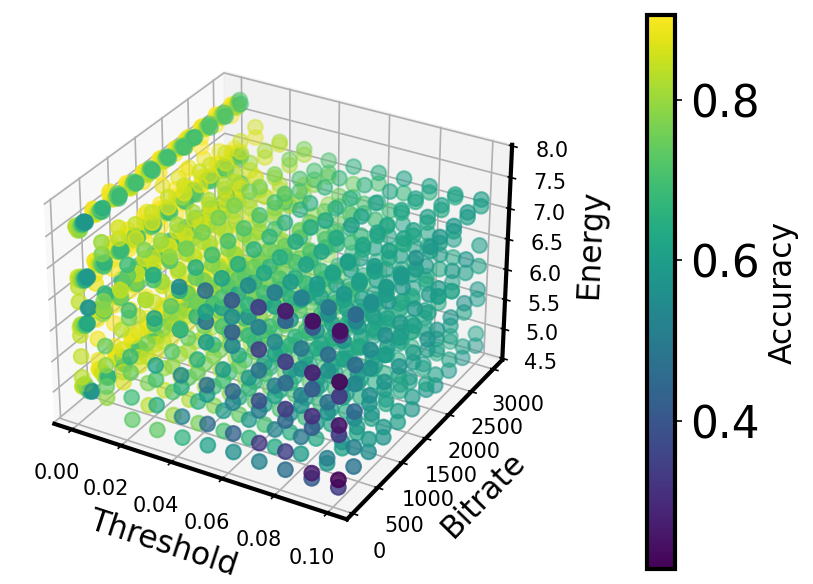

In [52]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

accuracy_df = pd.read_csv('accuracy-JH-1.csv')
energy_files = ['energy-JH-1.csv']
energy_df = pd.concat([pd.read_csv(f) for f in energy_files], ignore_index=True)
merged_df = pd.merge(accuracy_df, energy_df, on=["Frequency", "Filter", "Threshold", "Frame Bitrate"])
merged_df = merged_df.drop(columns=['FPS', 'Start Time', 'End Time'])

# merged_df = merged_df[(merged_df['Frequency'] == 2.4) & (merged_df['Filter'] == 'edge')]
# merged_df = merged_df[merged_df['Filter'] == 'area']
# merged_df = merged_df[(merged_df['Frequency'] == 1.5) & (merged_df['Filter'] == 'pixel')]

print(merged_df.head())

np.random.seed(42)
x = merged_df['Threshold'].to_list()
y = merged_df['Frame Bitrate'].to_list()
z = merged_df['Avg Energy'].to_list()
c = merged_df['Average IoU'].to_list()

# Create scatter plot
sc = ax.scatter(x, y, z, c=c, cmap='viridis', s=50)

label_fontsize = 15

# Add color bar
cbar = plt.colorbar(sc, ax=ax, pad=0.15)
cbar.set_label('Accuracy', fontsize=label_fontsize)

# Labels and title
ax.set_xlabel("Threshold", fontsize=label_fontsize)
ax.set_ylabel("Bitrate", fontsize=label_fontsize)
ax.set_zlabel("Energy", fontsize=label_fontsize)
ax.tick_params(axis='both', labelsize=10)
# ax.set_title("3D Scatter Plot with 4th Dimension as Color")

# Show plot
plt.show()

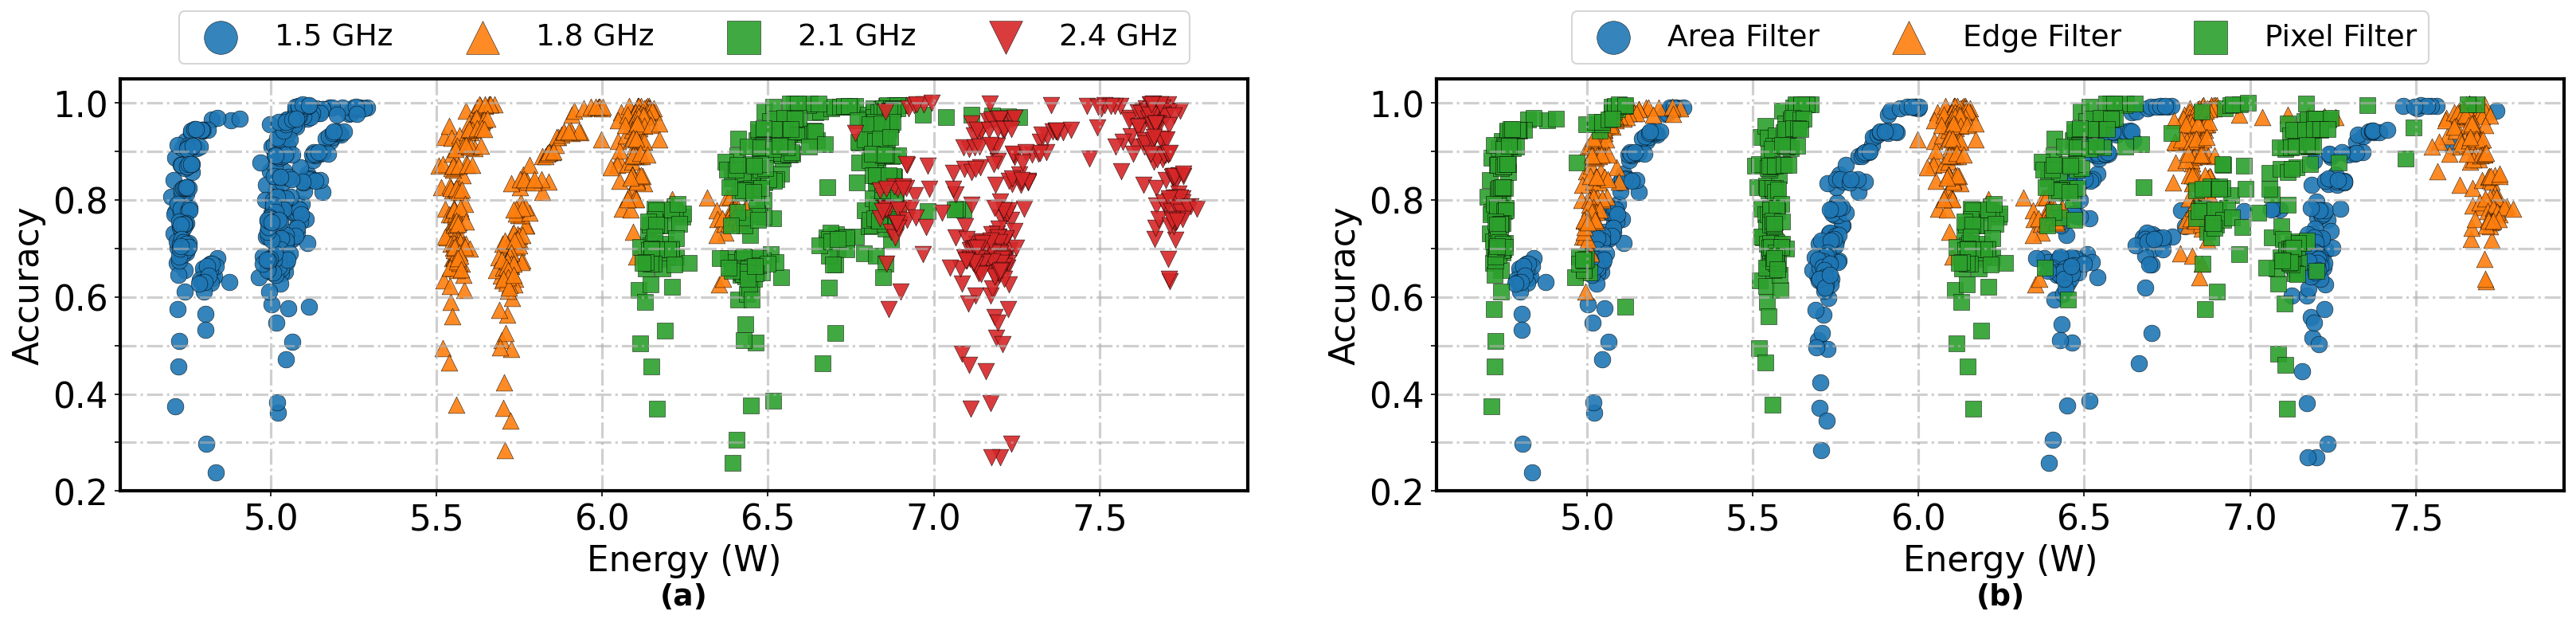

In [53]:
JH_day_accuracy_df = pd.read_csv('accuracy-JH-1.csv')
JH_day_energy_df = pd.read_csv('energy-JH-1.csv')
JH_day_df = pd.merge(JH_day_accuracy_df, JH_day_energy_df, on=["Frequency", "Filter", "Threshold", "Frame Bitrate"])
JH_day_df = JH_day_df.drop(columns=['FPS', 'Start Time', 'End Time'])
JH_day_df['Average IoU'] = JH_day_df['Average IoU'] / JH_day_df['Average IoU'].max()

# Define professional color scheme (hex codes)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Blue, Orange, Green, Red
markers = ['o', '^', 's', 'v']

# Create figure
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(22, 6))

# Plot frequency-based scatter plot
for i, (frequency, group) in enumerate(JH_day_df.groupby('Frequency')):
    ax.scatter(group['Avg Energy'], group['Average IoU'], marker=markers[i],
               color=colors[i % len(colors)], edgecolors='black', 
               label=f'{frequency} GHz', s=100, alpha=0.9, linewidth=0.25)

ax.set_xlabel('Energy (W)')
ax.set_ylabel('Accuracy')
ax.set_title('(a)', fontweight='bold', fontsize=18, y=-0.3)
ax.set_ylim(0.2, 1.05)
ax.set_yticks(np.arange(0.2, 1.1, 0.1))
for label in ax.yaxis.get_ticklabels()[1::2]:
    label.set_visible(False)

ax.grid(True, linestyle='-.', linewidth=1.5, alpha=0.6)
ax.legend(fontsize=18, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=4, markerscale=2)

# Second plot: Filter-based scatter plot
for i, (filter, group) in enumerate(JH_day_df.groupby('Filter')):
    ax2.scatter(group['Avg Energy'], group['Average IoU'], marker=markers[i],
                color=colors[i % len(colors)], edgecolors='black', 
                label=f'{filter.capitalize()} Filter', s=100, alpha=0.9, linewidth=0.25)

ax2.set_xlabel('Energy (W)')
ax2.set_ylabel('Accuracy')
ax2.set_title('(b)', fontweight='bold', fontsize=18, y=-0.3)
ax2.set_ylim(0.2, 1.05)
ax2.set_yticks(np.arange(0.2, 1.1, 0.1))
for label in ax2.yaxis.get_ticklabels()[1::2]:
    label.set_visible(False)

ax2.grid(True, linestyle='-.', linewidth=1.5, alpha=0.6)
ax2.legend(fontsize=18, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3, markerscale=2)

plt.tight_layout()
plt.show()

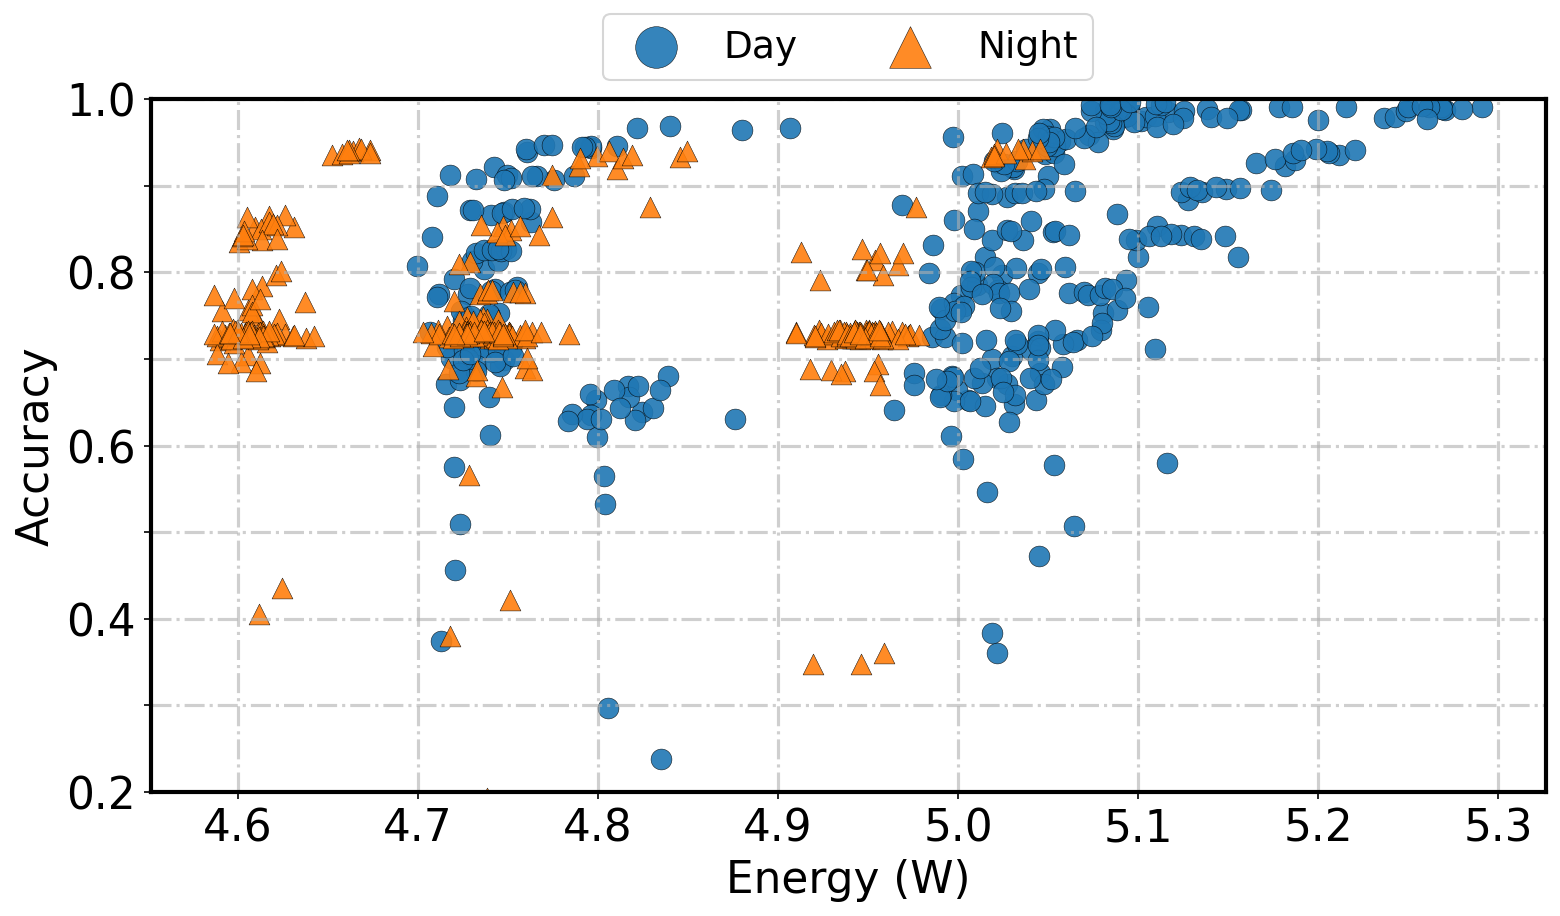

In [54]:
JH_night_accuracy_df = pd.read_csv('accuracy-JH-night-1.csv')
JH_night_energy_df = pd.read_csv(f'energy-JH-night-1.csv')

JH_night_df = pd.merge(JH_night_accuracy_df, JH_night_energy_df, on=["Frequency", "Filter", "Threshold", "Frame Bitrate"])
JH_night_df = JH_night_df.drop(columns=['FPS', 'Start Time', 'End Time'])

fig, ax = plt.subplots(figsize=(12, 6))

# Plot frequency-based scatter plot
ax.scatter(JH_day_df[JH_day_df['Frequency'] == 1.5]['Avg Energy'], JH_day_df[JH_day_df['Frequency'] == 1.5]['Average IoU'], marker=markers[0],
            color=colors[0], edgecolors='black', 
            label=f'Day', s=100, alpha=0.9, linewidth=0.25)

ax.scatter(JH_night_df[JH_night_df['Frequency'] == 1.5]['Avg Energy'], JH_night_df[JH_night_df['Frequency'] == 1.5]['Average IoU'], marker=markers[1],
            color=colors[1], edgecolors='black', 
            label=f'Night', s=100, alpha=0.9, linewidth=0.25)

ax.set_xlabel('Energy (W)')
ax.set_ylabel('Accuracy')
ax.set_ylim(0.2, 1)
ax.set_yticks(np.arange(0.2, 1.1, 0.1))
for label in ax.yaxis.get_ticklabels()[1::2]:
    label.set_visible(False)

ax.grid(True, linestyle='-.', linewidth=1.5, alpha=0.6)
ax.legend(fontsize=18, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=4, markerscale=2)

In [55]:
def plot_accuracy_simulation_run(data, ax, color, label, marker, plot_config_changes=False):

    plot_line_width = 3
    marker_size = 12

    frame_rate = 30

    x_vals = []
    y_vals = []
    config_changes = []
    current_config = None
    interval_start = 0

    # (start, end, config, running_accuracy, round_accuracy)
    for i in range(0, len(data) - 1, 2):
        start, _, config, _, _ = data[i]
        start2, end, config2, running_accuracy, _ = data[i + 1]

        start_time = start / frame_rate
        end_time = end / frame_rate

        x_vals.append(start_time)
        x_vals.append(end_time)
        y_vals.append(running_accuracy)
        y_vals.append(running_accuracy)
        
        if config != current_config:
            config_changes.append((start_time, config, running_accuracy))
            current_config = config

    if len(data) % 2 == 1:
        start, end, config, running_accuracy, round_accuracy = data[-1]
        
        x_vals.append(start / frame_rate)
        x_vals.append(end / frame_rate)
        y_vals.append(running_accuracy)
        y_vals.append(running_accuracy)
        if config != current_config:
            config_changes.append((start / frame_rate, config, running_accuracy))


    ax.plot(x_vals, y_vals, marker=marker, linestyle='-', color=color, markersize=marker_size, label=label, linewidth=plot_line_width)

    if plot_config_changes:
        for time, config, y in config_changes:
            ax.axvline(x=time, ymax=(y - ax.get_ylim()[0]) / (ax.get_ylim()[1] - ax.get_ylim()[0]), color='black', linestyle='--', alpha=0.8, linewidth=2)
            ax.text(time + 5, ax.get_ylim()[0] + 0.02, f'{config}', rotation=90, verticalalignment='bottom', fontsize=14, fontweight='bold', color='black')


In [56]:
def plot_energy_simulation_run(data, ax, color, label, marker, plot_config_changes=False):

    plot_line_width = 3
    marker_size = 10

    frame_rate = 30

    x_vals = []
    y_vals = []
    config_changes = []
    current_config = None
    interval_start = 0

    # (start, end, config, energy)
    for i in range(0, len(data)-1, 2):
        start, _, config, energy = data[i]
        start2, end, _, _ = data[i + 1]

        start_time = start / frame_rate
        end_time = end / frame_rate

        x_vals.append(start_time)
        x_vals.append(end_time)
        y_vals.append(energy)
        y_vals.append(energy)
        
        if config != current_config:
            config_changes.append((start_time, config, energy))
            current_config = config

    if len(data) % 2 == 1:
        start, end, config, energy = data[-1]
        
        x_vals.append(start / frame_rate)
        x_vals.append(end / frame_rate)
        y_vals.append(energy)
        y_vals.append(energy)
        if config != current_config:
            config_changes.append((start / frame_rate, config, energy))

    ax.plot(x_vals, y_vals, marker=marker, linestyle='-', color=color, label=label, markersize=marker_size, linewidth=plot_line_width)

    if plot_config_changes:
        for time, config, y in config_changes:
            ax.axvline(x=time, ymax=(y - ax.get_ylim()[0]) / (ax.get_ylim()[1] - ax.get_ylim()[0]), color='black', linestyle='--', alpha=0.8, linewidth=2)
            ax.text(time + 5, ax.get_ylim()[0] + 0.02, f'{config}', rotation=90, verticalalignment='bottom', fontsize=14, fontweight='bold', color='black')


In [57]:
# ============== JH DAY ACCURACY DATA ===================

ecolens_JH_day_90 = [
    (0, 1800, (0.01, 2400.0), 0.9067745277122308, 0.9067745277122308),
    (1800, 1950, (0.01, 2400.0), 0.9095261669228745, 0.9425458374505991),
    (1950, 3750, (0.02, 2400.0), 0.8853084039915141, 0.8590724941492069),
    (3750, 3900, (0.02, 2400.0), 0.88703091776348, 0.930093762062628),
    (3900, 5700, (0.02, 3000.0), 0.8666525338094205, 0.8224993685756251),
    (5700, 5850, (0.02, 3000.0), 0.86770995174372, 0.9078918332470949),
    (5850, 7650, (0.01, 2400.0), 0.8866999185660274, 0.9484173107385264),
    (7650, 7800, (0.01, 2400.0), 0.8874915201868595, 0.9278632028492992),
    (7800, 9600, (0.02, 3000.0), 0.8736238491956956, 0.8135306082339847),
    (9600, 9750, (0.02, 3000.0), 0.8754585817222367, 0.9928814634208626),
    (9750, 11550, (0.02, 3000.0), 0.8729583165812851, 0.8594152137344648),
    (11550, 11700, (0.02, 3000.0), 0.8740647013385437, 0.9592563276474559),
    (11700, 13500, (0.02, 3000.0), 0.8748370877193558, 0.8798575991946344),
    (13500, 13650, (0.02, 3000.0), 0.8758493175228302, 0.9669499998355398),
    (13650, 15450, (0.02, 3000.0), 0.8785010836532153, 0.8986103101419686),
    (15450, 15600, (0.02, 3000.0), 0.8784598602868338, 0.8742138535495335),
    (15600, 17400, (0.01, 3000.0), 0.8899460392387314, 0.9894929234885109),
    (17400, 17550, (0.01, 3000.0), 0.8908632403437271, 0.9972585685232368),
    (17550, 18017, (0.02, 2400.0), 0.8922220275826923, 0.9432856593682166),
]

noreprofile_JH_day_90 = [
    (0, 1800, (0.01, 2400.0), 0.9087070431210351, 0.9087070431210351),
    (1800, 3600, (0.01, 2400.0), 0.9123079888476154, 0.9159089345741959),
    (3600, 5400, (0.01, 2400.0), 0.8985142030652326, 0.870926631500467),
    (5400, 7200, (0.01, 2400.0), 0.9100102597129202, 0.9444984296559826),
    (7200, 9000, (0.01, 2400.0), 0.9053005751206217, 0.8864618367514278),
    (9000, 10800, (0.01, 2400.0), 0.9103338257007682, 0.9355000786015003),
    (10800, 12600, (0.01, 2400.0), 0.9065038647217989, 0.8835240988479839),
    (12600, 14400, (0.01, 2400.0), 0.9110789650856167, 0.9431046676323416),
    (14400, 16200, (0.01, 2400.0), 0.913371973319457, 0.9317160391901789),
    (16200, 18000, (0.01, 2400.0), 0.9168976368644742, 0.9486286087696293),
    (18000, 18017, (0.01, 2400.0), 0.9169315194724316, 0.9528072220154684),
]

baseline_JH_day = [
    (0, 1800, (0.00, 3000.0), 1.0, 1.0),
    (1800, 3600, (0.00, 3000.0), 1.0, 1.0),
    (3600, 5400, (0.00, 3000.0), 1.0, 1.0),
    (5400, 7200, (0.00, 3000.0), 1.0, 1.0),
    (7200, 9000, (0.00, 3000.0), 1.0, 1.0),
    (9000, 10800, (0.00, 3000.0), 1.0, 1.0),
    (10800, 12600, (0.00, 3000.0), 1.0, 1.0),
    (12600, 14400, (0.00, 3000.0), 1.0, 1.0),
    (14400, 16200, (0.00, 3000.0), 1.0, 1.0),
    (16200, 18000, (0.00, 3000.0), 1.0, 1.0),
    (18000, 18017, (0.00, 3000.0), 1.0, 1.0),
]

reducto_JH_day_90 = [
    (0, 1800, (0.0016, 3000), 0.9474940530359154, 0.9474940530359154),
    (1800, 3600, (0.0016, 3000), 0.941302775409106, 0.9351114977822965),
    (3600, 5400, (0.0016, 3000), 0.9197415060395182, 0.8766189673003425),
    (5400, 7200, (0.0016, 3000), 0.9256175353290065, 0.9432456231974714),
    (7200, 9000, (0.0016, 3000), 0.9241902267673475, 0.9184809925207121),
    (9000, 10800, (0.0016, 3000), 0.9282350527507168, 0.9484591826675635),
    (10800, 12600, (0.0016, 3000), 0.9267118860367016, 0.9175728857526108),
    (12600, 14400, (0.0016, 3000), 0.9289603707044222, 0.944699763378466),
    (14400, 16200, (0.0016, 3000), 0.931597946204629, 0.9526985502062844),
    (16200, 18000, (0.0016, 3000), 0.9371136625676975, 0.9867551098353137),
    (18000, 18017, (0.0016, 3000), 0.9371694611666121, 0.9962503306057939),
]


# ============== JH DAY ENERGY DATA ===================

ecolens_JH_energy_90 = [
    (0, 1800, (0.01, 2400), 4.7181788265306155),
    (1800, 1950, (0.01, 2400), 4.71289104477612),
    (1950, 3750, (0.02, 2400), 4.471865814266495),
    (3750, 3900, (0.02, 2400), 4.594461904761904),
    (3900, 5700, (0.02, 3000), 4.627951706036737),
    (5700, 5850, (0.02, 3000), 4.69647272727273),
    (5850, 7650, (0.01, 2400), 4.857164516129032),
    (7650, 7800, (0.01, 2400), 4.901301428571431),
    (7800, 9600, (0.02, 3000), 4.63431681759379),
    (9600, 9750, (0.02, 3000), 4.956131884057967),
    (9750, 11550, (0.02, 3000), 4.777281691919189),
    (11550, 11700, (0.02, 3000), 4.701592857142858),
    (11700, 13500, (0.02, 3000), 4.765267265725299),
    (13500, 13650, (0.02, 3000), 4.835945588235297),
    (13650, 15450, (0.02, 3000), 4.724095679796704),
    (15450, 15600, (0.02, 3000), 4.57421515151515),
    (15600, 17400, (0.01, 3000), 4.9367460984393725),
    (17400, 17550, (0.01, 3000), 4.924212676056336),
    (17550, 18017, (0.02, 2400), 4.893047887323942),
]

noreprofile_JH_energy_90 = [
    (0, 1800, (0.01, 2400), 4.753928822055146),
    (1800, 1950, (0.01, 2400), 4.671923076923076),
    (1950, 3750, (0.01, 2400), 4.610788829787234),
    (3750, 3900, (0.01, 2400), 4.650090909090909),
    (3900, 5700, (0.01, 2400), 4.799784891165172),
    (5700, 5850, (0.01, 2400), 4.838166666666669),
    (5850, 7650, (0.01, 2400), 4.872179925650557),
    (7650, 7800, (0.01, 2400), 4.843288732394366),
    (7800, 9600, (0.01, 2400), 4.731406234096691),
    (9600, 9750, (0.01, 2400), 4.953607042253521),
    (9750, 11550, (0.01, 2400), 4.813439924906142),
    (11550, 11700, (0.01, 2400), 4.799200000000002),
    (11700, 13500, (0.01, 2400), 4.907197040690498),
    (13500, 13650, (0.01, 2400), 4.912647222222223),
    (13650, 15450, (0.01, 2400), 4.804009689440995),
    (15450, 15600, (0.01, 2400), 4.711614492753624),
    (15600, 17400, (0.01, 2400), 4.923556610576922),
    (17400, 17550, (0.01, 2400), 4.9989277777777765),
    (17550, 18017, (0.01, 2400), 4.984399999999998),
]

baseline_JH_energy_1_5 = [
    (0, 1800, (0.0, 3000), 4.922810827250611),
    (1800, 1950, (0.0, 3000), 4.824286363636363),
    (1950, 3750, (0.0, 3000), 4.897632291666665),
    (3750, 3900, (0.0, 3000), 4.896529687500001),
    (3900, 5700, (0.0, 3000), 4.95155041617122),
    (5700, 5850, (0.0, 3000), 5.010274324324326),
    (5850, 7650, (0.0, 3000), 5.065787022016221),
    (7650, 7800, (0.0, 3000), 4.9870397260273975),
    (7800, 9600, (0.0, 3000), 5.021708944954126),
    (9600, 9750, (0.0, 3000), 5.032634722222227),
    (9750, 11550, (0.0, 3000), 4.99969726516052),
    (11550, 11700, (0.0, 3000), 4.952873333333331),
    (11700, 13500, (0.0, 3000), 5.012407801418436),
    (13500, 13650, (0.0, 3000), 4.974375342465752),
    (13650, 15450, (0.0, 3000), 4.963980141010587),
    (15450, 15600, (0.0, 3000), 4.941880000000003),
    (15600, 17400, (0.0, 3000), 4.967145813953494),
    (17400, 17550, (0.0, 3000), 4.931416216216215),
    (17550, 18017, (0.0, 3000), 5.0261999999999984),
]

baseline_JH_energy_2_4 = [
    (0, 1800, (0.0, 3000), 7.1314799185888855),
    (1800, 1950, (0.0, 3000), 7.056539062500002),
    (1950, 3750, (0.0, 3000), 7.064780246913579),
    (3750, 3900, (0.0, 3000), 7.013104838709678),
    (3900, 5700, (0.0, 3000), 7.206173841961846),
    (5700, 5850, (0.0, 3000), 7.266930158730161),
    (5850, 7650, (0.0, 3000), 7.2673269282814426),
    (7650, 7800, (0.0, 3000), 7.13197777777778),
    (7800, 9600, (0.0, 3000), 7.253166576086945),
    (9600, 9750, (0.0, 3000), 7.094306349206349),
    (9750, 11550, (0.0, 3000), 7.192154149659884),
    (11550, 11700, (0.0, 3000), 7.634623188405799),
    (11700, 13500, (0.0, 3000), 7.265562550881942),
    (13500, 13650, (0.0, 3000), 7.215974193548384),
    (13650, 15450, (0.0, 3000), 7.3377481132075415),
    (15450, 15600, (0.0, 3000), 7.301617460317462),
    (15600, 17400, (0.0, 3000), 7.2682409459459425),
    (17400, 17550, (0.0, 3000), 7.238842424242424),
    (17550, 18017, (0.0, 3000), 7.305344791666658),
]

reducto_JH_energy = [
    (0, 1800, (0.0016, 3000), 7.648895424836604),
    (1800, 1950, (0.0016, 3000), 7.373070149253736),
    (1950, 3750, (0.0016, 3000), 7.579206447368444),
    (3750, 3900, (0.0016, 3000), 7.462577272727271),
    (3900, 5700, (0.0016, 3000), 7.479213077939237),
    (5700, 5850, (0.0016, 3000), 7.379498484848487),
    (5850, 7650, (0.0016, 3000), 7.556503430079152),
    (7650, 7800, (0.0016, 3000), 7.442113432835824),
    (7800, 9600, (0.0016, 3000), 7.409757615894023),
    (9600, 9750, (0.0016, 3000), 7.7767954545454545),
    (9750, 11550, (0.0016, 3000), 7.582614814814789),
    (11550, 11700, (0.0016, 3000), 7.435179710144927),
    (11700, 13500, (0.0016, 3000), 7.496643541944073),
    (13500, 13650, (0.0016, 3000), 7.715023880597021),
    (13650, 15450, (0.0016, 3000), 7.562324074074066),
    (15450, 15600, (0.0016, 3000), 7.221843076923075),
    (15600, 17400, (0.0016, 3000), 7.759944415243099),
    (17400, 17550, (0.0016, 3000), 7.725158461538463),
    (17550, 18017, (0.0016, 3000), 7.918769651741289),
]


# ============== JH NIGHT ACCURACY DATA ===================
ecolens_JH_night_90 = [
    (0, 1800, (0.0, 400.0), 0.9362575557454722, 0.9362575557454722),
    (1800, 1950, (0.0, 400.0), 0.9371664837880895, 0.948073620299498),
    (1950, 3750, (0.0, 400.0), 0.9330348222039471, 0.9285588554877925),
    (3750, 3900, (0.0, 400.0), 0.9267582117284398, 0.769842949840758),
    (3900, 5700, (0.0, 3000.0), 0.9498871974984062, 1.0),
    (5700, 5850, (0.0, 3000.0), 0.9511721411522932, 1.0),
    (5850, 7650, (0.01, 2400.0), 0.9236547781826617, 0.8342233485313588),
    (7650, 7800, (0.01, 2400.0), 0.9213612646833309, 0.804392076217466),
    (7800, 9600, (0.0, 3000.0), 0.9361060275552063, 1.0),
    (9600, 9750, (0.0, 3000.0), 0.9370890117466647, 1.0),
    (9750, 11550, (0.02, 400.0), 0.9131936666904988, 0.7837605476362671),
    (11550, 11700, (0.02, 400.0), 0.9098740703617412, 0.6542651530474088),
    (11700, 13500, (0.0, 3000.0), 0.9218908609801757, 1.0),
    (13500, 13650, (0.0, 3000.0), 0.9227492031672068, 1.0),
    (13650, 15450, (0.0, 1000.0), 0.9261758975991915, 0.9521616637084094),
    (15450, 15600, (0.0, 1000.0), 0.9263331557622695, 0.942530746559302),
    (15600, 17400, (0.1, 3000.0), 0.8888372662783111, 0.5638728907506713),
    (17400, 17550, (0.1, 3000.0), 0.8852643035724095, 0.47080062968782016),
    (17550, 18030, (0.1, 100.0), 0.8731395529619452, 0.4298283587668471),
]

noreprofile_JH_night_90 = [
    (0, 1800, (0.0, 400.0), 0.9391835139782204, 0.9391835139782204),
    (1800, 3600, (0.0, 400.0), 0.9348248039382964, 0.9304660938983722),
    (3600, 5400, (0.0, 400.0), 0.9297837447212028, 0.9197016262870161),
    (5400, 7200, (0.0, 400.0), 0.9292432923482354, 0.927621935229333),
    (7200, 9000, (0.0, 400.0), 0.9285740495501152, 0.9258970783576346),
    (9000, 10800, (0.0, 400.0), 0.9282792030995434, 0.9268049708466835),
    (10800, 12600, (0.0, 400.0), 0.9282410458107877, 0.9280121020782532),
    (12600, 14400, (0.0, 400.0), 0.9270573474613925, 0.9187714590156252),
    (14400, 16200, (0.0, 400.0), 0.9278251690886475, 0.9339677421066878),
    (16200, 18000, (0.0, 400.0), 0.9247515592007242, 0.8970890702094134),
    (18000, 18030, (0.0, 400.0), 0.9247629773669751, 0.9316138771176339),
]


# ============== JH NIGHT ENERGY DATA ===================

ecolens_JH_night_energy_90 = [
    (0, 1800, (0.0, 400), 4.9193933949801805),
    (1800, 1950, (0.0, 400), 4.985678787878787),
    (1950, 3750, (0.0, 400), 4.716490266666675),
    (3750, 3900, (0.0, 400), 4.703404687500003),
    (3900, 5700, (0.0, 3000), 4.739827770360482),
    (5700, 5850, (0.0, 3000), 4.6095640625000005),
    (5850, 7650, (0.01, 2400), 4.213700682128234),
    (7650, 7800, (0.01, 2400), 4.169788709677419),
    (7800, 9600, (0.0, 3000), 4.956282957393489),
    (9600, 9750, (0.0, 3000), 4.814653125000003),
    (9750, 11550, (0.02, 400), 4.2191728142076474),
    (11550, 11700, (0.02, 400), 4.1521828124999995),
    (11700, 13500, (0.0, 3000), 4.740052000000004),
    (13500, 13650, (0.0, 3000), 4.727955555555556),
    (13650, 15450, (0.0, 1000), 4.67389103078983),
    (15450, 15600, (0.0, 1000), 4.698359375000001),
    (15600, 17400, (0.1, 3000), 4.186034153005462),
    (17400, 17550, (0.1, 3000), 4.165645161290322),
    (17550, 18030, (0.1, 100), 4.185393846153843),
]

noreprofile_JH_night_energy_90 = [
    (0, 1800, (0.0, 400), 5.048510106382978),
    (1800, 3600, (0.0, 400), 5.033799211563731),
    (3600, 5400, (0.0, 400), 5.080869161290319),
    (5400, 7200, (0.0, 400), 5.041805672823218),
    (7200, 9000, (0.0, 400), 5.05140743691899),
    (9000, 10800, (0.0, 400), 5.075869078947372),
    (10800, 12600, (0.0, 400), 5.03648507265522),
    (12600, 14400, (0.0, 400), 5.067789591567858),
    (14400, 16200, (0.0, 400), 4.9822505976095535),
    (16200, 18000, (0.0, 400), 5.037481878306871),
    # (18000, 18030, (0.0, 400), 4.912),
]

baseline_JH_night_energy_1_5 = [
    (0, 1800, (0.0, 3000), 5.026119710906699),
    (1800, 1950, (0.0, 3000), 5.034038805970151),
    (1950, 3750, (0.0, 3000), 5.071407333333337),
    (3750, 3900, (0.0, 3000), 5.046259375000002),
    (3900, 5700, (0.0, 3000), 5.105235270805816),
    (5700, 5850, (0.0, 3000), 5.054229687499998),
    (5850, 7650, (0.0, 3000), 5.0669440903054435),
    (7650, 7800, (0.0, 3000), 4.90682923076923),
    (7800, 9600, (0.0, 3000), 5.011942895086319),
    (9600, 9750, (0.0, 3000), 5.061558730158733),
    (9750, 11550, (0.0, 3000), 5.0648291443850315),
    (11550, 11700, (0.0, 3000), 5.03071515151515),
    (11700, 13500, (0.0, 3000), 5.046632005312082),
    (13500, 13650, (0.0, 3000), 5.0187390625),
    (13650, 15450, (0.0, 3000), 5.053338726790446),
    (15450, 15600, (0.0, 3000), 5.015935937500003),
    (15600, 17400, (0.0, 3000), 5.057097742363871),
    (17400, 17550, (0.0, 3000), 5.009651562499999),
    (17550, 18030, (0.0, 3000), 5.029262436548225),
]

baseline_JH_night_energy_2_4 = [
    (0, 1800, (0.0, 3000), 6.991750588235295),
    (1800, 1950, (0.0, 3000), 6.841773529411767),
    (1950, 3750, (0.0, 3000), 7.152838860759505),
    (3750, 3900, (0.0, 3000), 7.025598484848486),
    (3900, 5700, (0.0, 3000), 6.952548221343873),
    (5700, 5850, (0.0, 3000), 7.028873015873015),
    (5850, 7650, (0.0, 3000), 6.991362549800802),
    (7650, 7800, (0.0, 3000), 6.817084615384622),
    (7800, 9600, (0.0, 3000), 7.118311503267977),
    (9600, 9750, (0.0, 3000), 6.901639682539682),
    (9750, 11550, (0.0, 3000), 7.087303790849675),
    (11550, 11700, (0.0, 3000), 7.472300000000001),
    (11700, 13500, (0.0, 3000), 7.027746562905305),
    (13500, 13650, (0.0, 3000), 6.845465333333333),
    (13650, 15450, (0.0, 3000), 7.0424503267973835),
    (15450, 15600, (0.0, 3000), 7.29543230769231),
    (15600, 17400, (0.0, 3000), 7.028864797913944),
    (17400, 17550, (0.0, 3000), 7.130300000000003),
    (17550, 18017, (0.0, 3000), 6.886461083743847),
]

reducto_JH_night_energy = [
    (0, 1800, (0.0, 3000), 7.94427598371778),
    (1800, 3600, (0.0, 3000), 7.901219482288835),
    (3600, 5400, (0.0, 3000), 7.87729553450608),
    (5400, 7200, (0.0, 3000), 7.778226045883927),
    (7200, 9000, (0.0, 3000), 7.81563455284553),
    (9000, 10800, (0.0, 3000), 7.9697767068272976),
    (10800, 12600, (0.0, 3000), 7.9588607287449395),
    (12600, 14400, (0.0, 3000), 8.012772533333308),
    (14400, 16200, (0.0, 3000), 7.9827103078982615),
    (16200, 18000, (0.0, 3000), 8.002922691292857),
    (18000, 18030, (0.0, 3000), 7.720114285714287),
]

# ============== ALMA ACCURACY DATA ===================

ecolens_Alma_90 = [
    (0, 1800, (0.02, 2100.0), 0.8557024603841046, 0.8557024603841046),
    (1800, 1950, (0.02, 2100.0), 0.8551599416608732, 0.8486497169820959),
    (1950, 3750, (0.01, 1600.0), 0.889944799000456, 0.9276283944516706),
    (3750, 3900, (0.01, 1600.0), 0.8911126437207898, 0.9203087617291343),
    (3900, 5700, (0.04, 3000.0), 0.8970583398282884, 0.9099406813945352),
    (5700, 5850, (0.04, 3000.0), 0.8973861409150645, 0.909842582212554),
    (5850, 7650, (0.08, 1600.0), 0.8538958540079973, 0.7125524215600286),
    (7650, 7800, (0.08, 1600.0), 0.8520644239603716, 0.7586614915314643),
    (7800, 9600, (0.01, 3000.0), 0.8706436912562807, 0.9511538495385533),
    (9600, 9750, (0.01, 3000.0), 0.871646935343539, 0.9358545569280786),
    (9750, 11550, (0.03, 1600.0), 0.8720234193923918, 0.874062707990345),
    (11550, 11700, (0.03, 1600.0), 0.8721087037042011, 0.8786755957135131),
    (11700, 13500, (0.06, 1900.0), 0.866814098068111, 0.832399161433526),
    (13500, 13650, (0.06, 1900.0), 0.8672310544223608, 0.9047571263048383),
    (13650, 15450, (0.08, 1900.0), 0.8705002353608797, 0.8952915241446476),
    (15450, 15600, (0.08, 1900.0), 0.8711100384542826, 0.9339197570747793),
    (15600, 17400, (0.09, 2400.0), 0.8778722437597436, 0.9364780230737391),
    (17400, 17550, (0.09, 2400.0), 0.8785333725352229, 0.9552243104908203),
    (17550, 18002, (0.08, 1900.0), 0.8798111015348763, 0.9294220394638959),
]

noreprofile_Alma_90 = [
    (0, 1800, (0.02, 2100.0), 0.8502081136373857, 0.8502081136373857),
    (1800, 3600, (0.02, 2100.0), 0.8729439743619981, 0.8956798350866106),
    (3600, 5400, (0.02, 2100.0), 0.8801204038691709, 0.8944732628835165),
    (5400, 7200, (0.02, 2100.0), 0.8789778024125076, 0.8755499980425174),
    (7200, 9000, (0.02, 2100.0), 0.884747852910276, 0.9078280549013495),
    (9000, 10800, (0.02, 2100.0), 0.8840389663774443, 0.8804945337132858),
    (10800, 12600, (0.02, 2100.0), 0.8843003371159783, 0.8858685615471824),
    (12600, 14400, (0.02, 2100.0), 0.883804185804959, 0.8803311266278234),
    (14400, 16200, (0.02, 2100.0), 0.8853692745287627, 0.8978899843191924),
    (16200, 18000, (0.02, 2100.0), 0.8884705548077377, 0.9163820773185134),
    (18000, 18002, (0.02, 2100.0), 0.8884820794217103, 0.9922036051750183),
]

reducto_Alma_90 = [
    (0, 1800, (0.004, 3000), 0.9594006940588861, 0.9594006940588861),
    (1800, 3600, (0.004, 3000), 0.9615255711345855, 0.9636504482102847),
    (3600, 5400, (0.004, 3000), 0.9616545546093167, 0.961912521558779),
    (5400, 7200, (0.004, 3000), 0.9531808486441267, 0.9277597307485566),
    (7200, 9000, (0.004, 3000), 0.9515814051884008, 0.9451836313654971),
    (9000, 10800, (0.004, 3000), 0.9509912004485752, 0.9480401767494467),
    (10800, 12600, (0.004, 3000), 0.9512294007627238, 0.9526586026476146),
    (12600, 14400, (0.004, 3000), 0.9523607291444008, 0.9602800278161407),
    (14400, 16200, (0.004, 3000), 0.9543006831483567, 0.9698203151800032),
    (16200, 18000, (0.004, 3000), 0.9566680960031004, 0.9779748116957933),
    (18000, 18002, (0.004, 3000), 0.9566723141274149, 0.9946354329586029),
]

# ============== ALMA ENERGY DATA ===================

ecolens_Alma_energy_90 = [
    (0, 1800, (0.02, 2100), 4.008765714285715),
    (1800, 1950, (0.02, 2100), 3.93692537313433),
    (1950, 3750, (0.01, 1600), 4.189204283965719),
    (3750, 3900, (0.01, 1600), 4.094652857142857),
    (3900, 5700, (0.04, 3000), 4.092280548926013),
    (5700, 5850, (0.04, 3000), 4.054339436619718),
    (5850, 7650, (0.08, 1600), 4.088188290398118),
    (7650, 7800, (0.08, 1600), 4.054873239436623),
    (7800, 9600, (0.01, 3000), 4.153271277842912),
    (9600, 9750, (0.01, 3000), 4.1462369047619045),
    (9750, 11550, (0.03, 1600), 4.089680159635127),
    (11550, 11700, (0.03, 1600), 4.100821333333334),
    (11700, 13500, (0.06, 1900), 4.053936182019981),
    (13500, 13650, (0.06, 1900), 4.075321917808219),
    (13650, 15450, (0.08, 1900), 4.050126402640265),
    (15450, 15600, (0.08, 1900), 4.073207894736842),
    (15600, 17400, (0.09, 2400), 4.061982023681379),
    (17400, 17550, (0.09, 2400), 4.187046753246755),
    (17550, 18002, (0.08, 1900), 4.062643495934957),
]

noreprofile_Alma_energy_90 = [
    (0, 1800, (0.02, 2100), 4.014858970976258),
    (1800, 3600, (0.02, 2100), 4.085511949685539),
    (3600, 5400, (0.02, 2100), 4.154639537712893),
    (5400, 7200, (0.02, 2100), 4.102424256837097),
    (7200, 9000, (0.02, 2100), 4.115701304863581),
    (9000, 10800, (0.02, 2100), 4.208395127610215),
    (10800, 12600, (0.02, 2100), 4.17414960000001),
    (12600, 14400, (0.02, 2100), 4.095535062006772),
    (14400, 16200, (0.02, 2100), 4.096067149220486),
    (16200, 18000, (0.02, 2100), 4.105311050920911),
    (18000, 18002, (0.02, 2100), 4.05998),
]

baseline_Alma_energy_1_5 = [
    (0, 1800, (0.0, 3000), 4.469662318840575),
    (1800, 3600, (0.0, 3000), 4.45515480880649),
    (3600, 5400, (0.0, 3000), 4.534600218340613),
    (5400, 7200, (0.0, 3000), 4.545949507119387),
    (7200, 9000, (0.0, 3000), 4.517446810810809),
    (9000, 10800, (0.0, 3000), 4.532287352625941),
    (10800, 12600, (0.0, 3000), 4.458184138655462),
    (12600, 14400, (0.0, 3000), 4.493254764397912),
    (14400, 16200, (0.0, 3000), 4.499256171548121),
    (16200, 18000, (0.0, 3000), 4.494261003070627),
    (18000, 18002, (0.0, 3000), 4.039066666666667),
]

baseline_Alma_energy_2_4 = [
    (0, 1800, (0.0, 3000), 7.228802416107391),
    (1800, 3600, (0.0, 3000), 7.2340938320209816),
    (3600, 5400, (0.0, 3000), 7.264034140127395),
    (5400, 7200, (0.0, 3000), 7.304195741935487),
    (7200, 9000, (0.0, 3000), 7.273037338501294),
    (9000, 10800, (0.0, 3000), 7.254665374676992),
    (10800, 12600, (0.0, 3000), 7.2043268694550004),
    (12600, 14400, (0.0, 3000), 7.265791464968153),
    (14400, 16200, (0.0, 3000), 7.2000022641509585),
    (16200, 18000, (0.0, 3000), 7.219832957393475),
    (18000, 18002, (0.0, 3000), 6.81175),
]

reducto_Alma_energy = [
    (0, 1800, (0.004, 3000), 7.499771184210529),
    (1800, 3600, (0.004, 3000), 7.4940700000000025),
    (3600, 5400, (0.004, 3000), 7.320467819148953),
    (5400, 7200, (0.004, 3000), 7.303310386151805),
    (7200, 9000, (0.004, 3000), 7.304883466666664),
    (9000, 10800, (0.004, 3000), 7.40067038512616),
    (10800, 12600, (0.004, 3000), 7.468537417654803),
    (12600, 14400, (0.004, 3000), 7.380535199999997),
    (14400, 16200, (0.004, 3000), 7.383683819628642),
    (16200, 18000, (0.004, 3000), 7.400654847277562),
    (18000, 18002, (0.004, 3000), 7.3607000000000005),
]

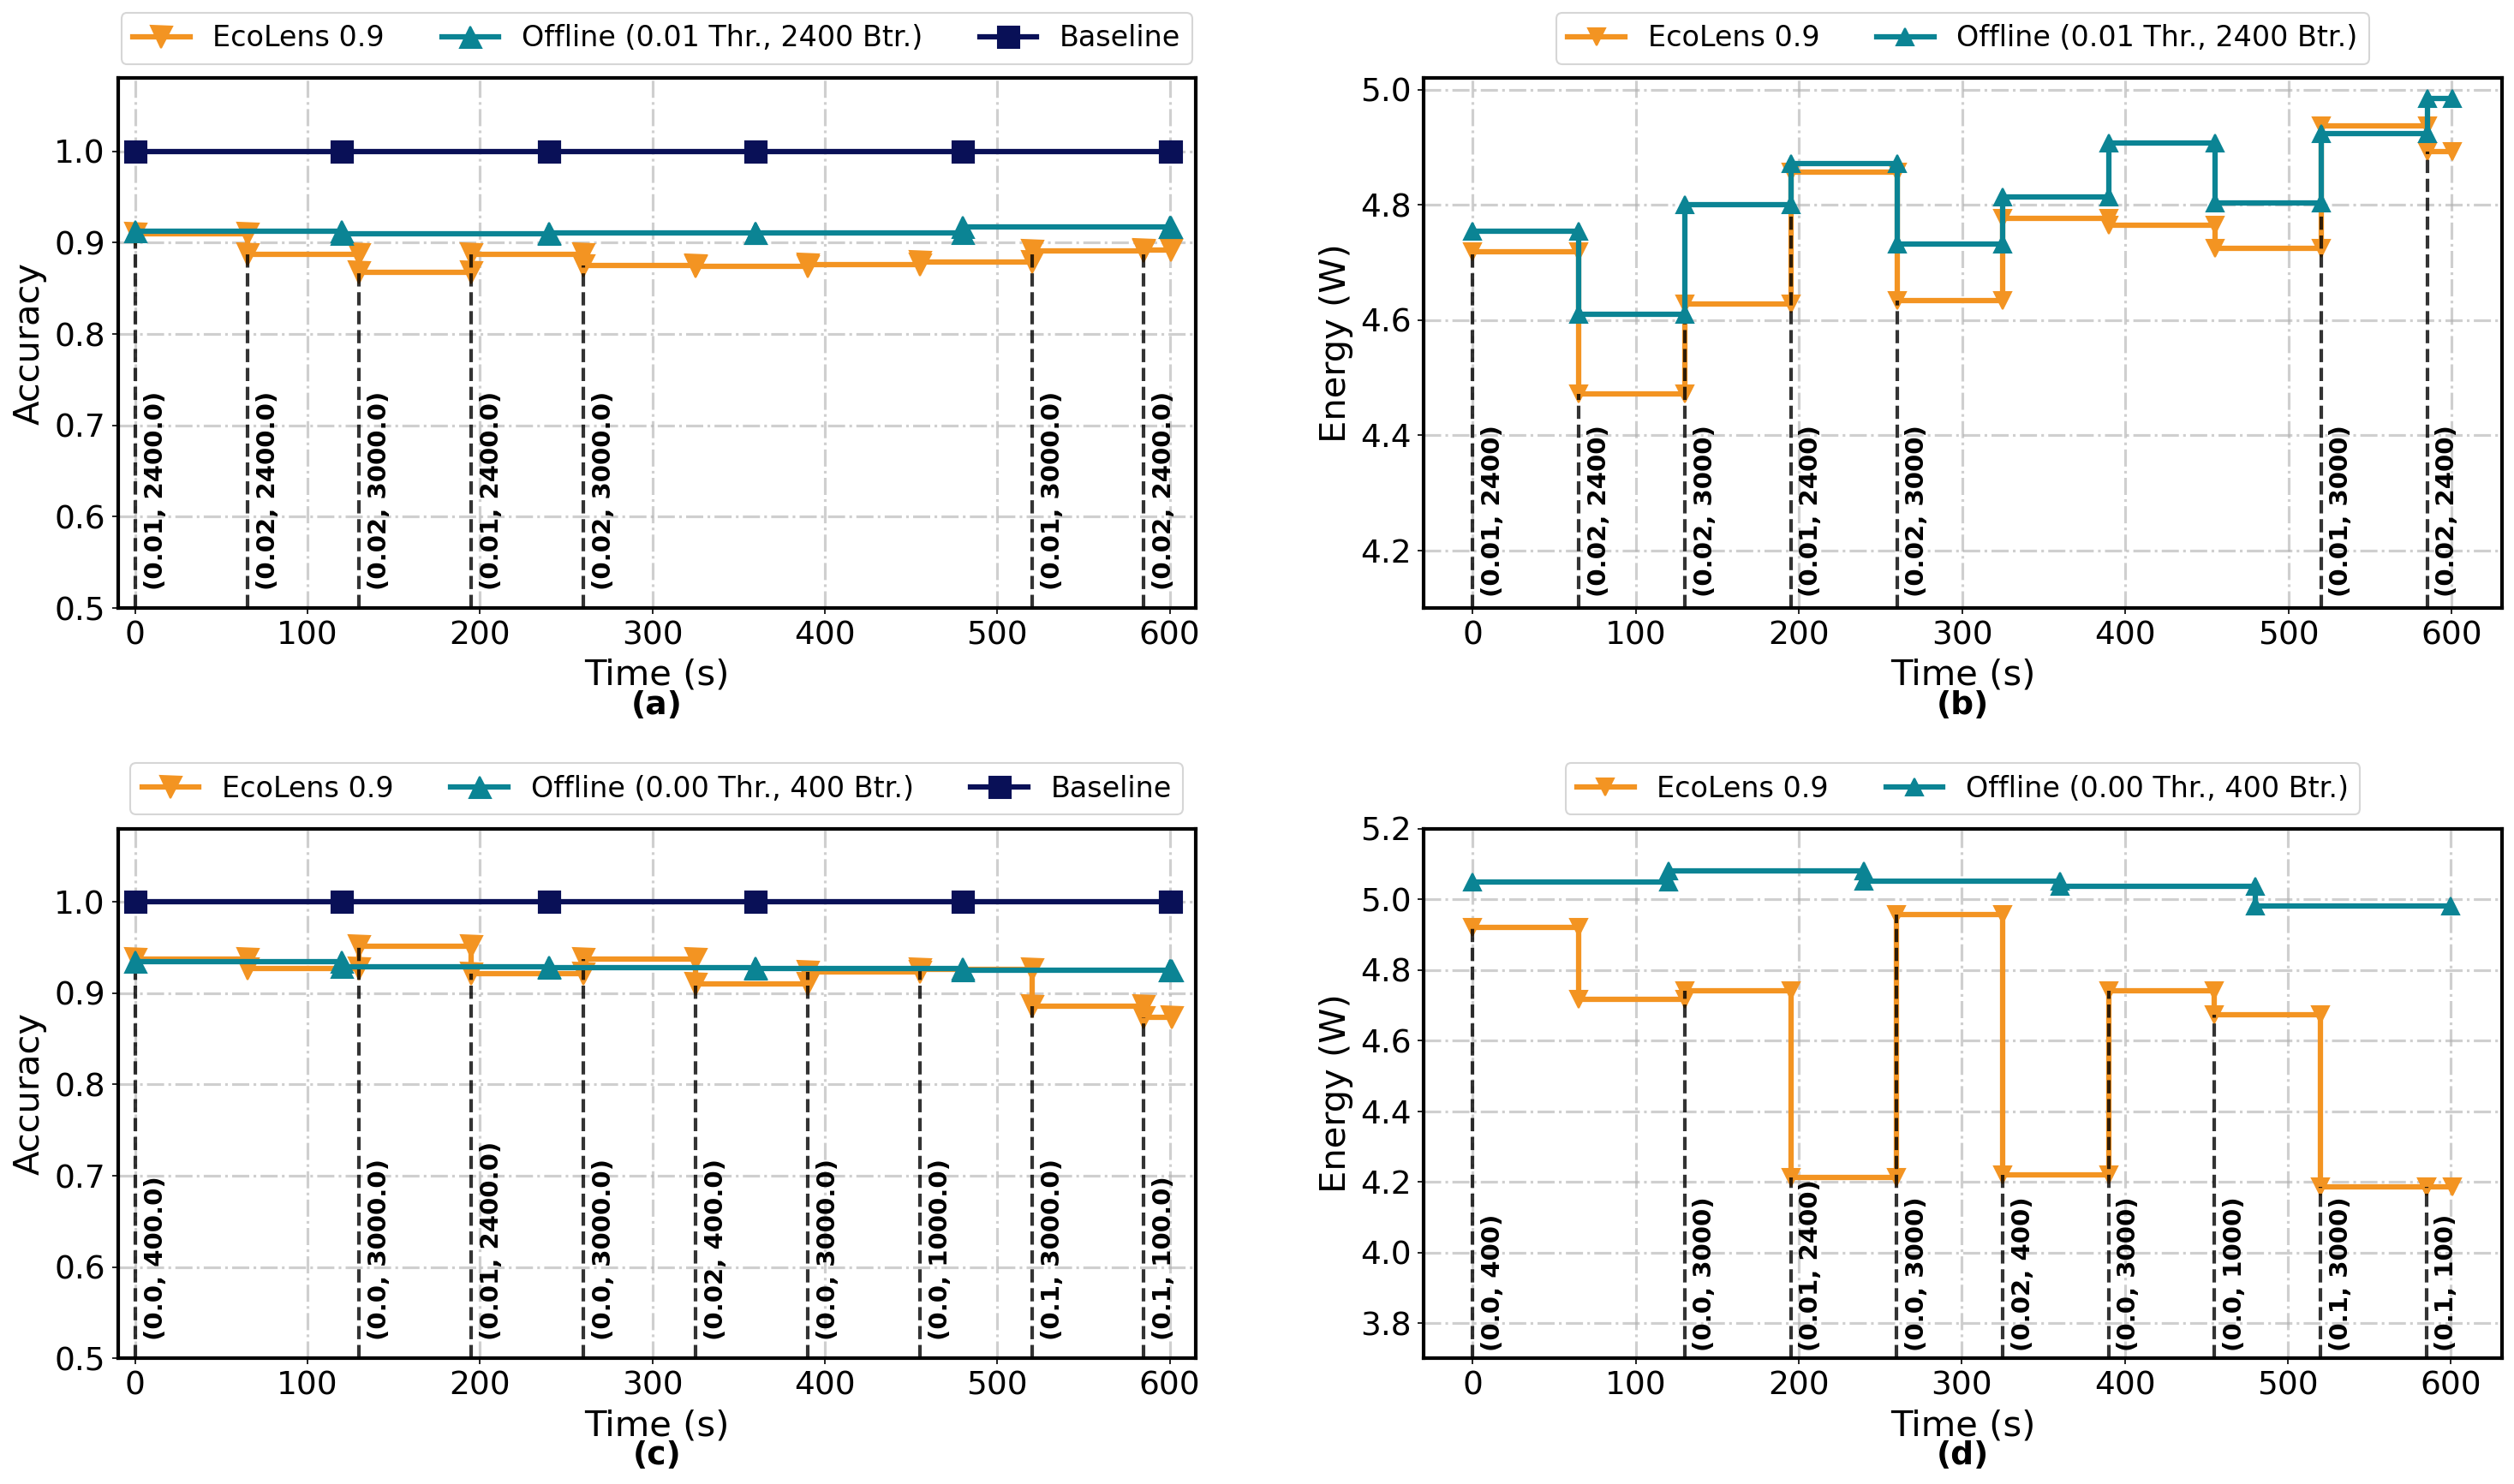

In [58]:
fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

colors = ['#F39422', '#091057', '#0B8494']

legend_fontsize = 16
tick_fontsize = 18

ax.set_xlabel('Time (s)', fontsize=20, color='black')
ax.set_ylabel('Accuracy', fontsize=20, color='black')
ax.set_title('(a)', fontweight='bold', fontsize=18, y=-0.22)
ax.grid(True, linestyle='-.', linewidth=1.5, alpha=0.6)
ax.tick_params(axis='both', labelsize=tick_fontsize, colors='black')
ax.set_ylim(0.5, 1.08)
ax.set_xlim(-10, 615)

plot_accuracy_simulation_run(ecolens_JH_day_90, ax, colors[0], label='EcoLens 0.9', marker='v', plot_config_changes=True)
plot_accuracy_simulation_run(noreprofile_JH_day_90, ax, colors[2], label='Offline (0.01 Thr., 2400 Btr.)', marker='^')
plot_accuracy_simulation_run(baseline_JH_day, ax, colors[1], label='Baseline', marker='s')
ax.legend(fontsize=legend_fontsize, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3)


ax2.set_xlabel('Time (s)', fontsize=20, color='black')
ax2.set_ylabel('Energy (W)', fontsize=20, color='black')
ax2.set_title('(b)', fontweight='bold', fontsize=18, y=-0.22)
ax2.grid(True, linestyle='-.', linewidth=1.5, alpha=0.6)

ax2.tick_params(axis='both', labelsize=tick_fontsize, colors='black')
ax2.set_ylim(4.1, 5.02)

plot_energy_simulation_run(ecolens_JH_energy_90, ax2, color=colors[0], label='EcoLens 0.9', marker='v', plot_config_changes=True)
plot_energy_simulation_run(noreprofile_JH_energy_90, ax2, color=colors[2], label='Offline (0.01 Thr., 2400 Btr.)', marker='^')
# plot_energy_simulation_run(baseline_JH_energy_1_5, ax2, color=colors[1], label='Baseline', marker='s')
ax2.legend(fontsize=legend_fontsize, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=5)


ax3.set_xlabel('Time (s)', fontsize=20, color='black')
ax3.set_ylabel('Accuracy', fontsize=20, color='black')
ax3.set_title('(c)', fontweight='bold', fontsize=18, y=-0.22)
ax3.grid(True, linestyle='-.', linewidth=1.5, alpha=0.6)
ax3.tick_params(axis='both', labelsize=tick_fontsize, colors='black')
ax3.set_ylim(0.5, 1.08)
ax3.set_xlim(-10, 615)

plot_accuracy_simulation_run(ecolens_JH_night_90, ax3, colors[0], label='EcoLens 0.9', marker='v', plot_config_changes=True)
plot_accuracy_simulation_run(noreprofile_JH_night_90, ax3, colors[2], label='Offline (0.00 Thr., 400 Btr.)', marker='^')
plot_accuracy_simulation_run(baseline_JH_day, ax3, color=colors[1], label='Baseline', marker='s')
ax3.legend(fontsize=legend_fontsize, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3)


ax4.set_xlabel('Time (s)', fontsize=20, color='black')
ax4.set_ylabel('Energy (W)', fontsize=20, color='black')
ax4.set_title('(d)', fontweight='bold', fontsize=18, y=-0.22)
ax4.grid(True, linestyle='-.', linewidth=1.5, alpha=0.6)

ax4.tick_params(axis='both', labelsize=tick_fontsize, colors='black')
ax4.set_ylim(3.7, 5.2)

plot_energy_simulation_run(ecolens_JH_night_energy_90, ax4, color=colors[0], label='EcoLens 0.9', marker='v', plot_config_changes=True)
plot_energy_simulation_run(noreprofile_JH_night_energy_90, ax4, color=colors[2], label='Offline (0.00 Thr., 400 Btr.)', marker='^')
# plot_energy_simulation_run(baseline_JH_night_energy_1_5, ax4, color=colors[1], label='Baseline (0.0, 3000)', marker='s')
ax4.legend(fontsize=legend_fontsize, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2)

plt.tight_layout()
plt.show()

In [59]:
def average_energy(energy_data):
    energy_sum = 0
    for i in range(len(energy_data)):
        energy_sum += energy_data[i][3] * (energy_data[i][1] - energy_data[i][0])
    return energy_sum / energy_data[-1][1]

# JH DAY
print(f'JH Day ecolens: {round(average_energy(ecolens_JH_energy_90), 3)}')
print(f'JH Day no reprofile: {round(average_energy(noreprofile_JH_energy_90), 3)}')
print(f'JH Day 1.5 baseline: {round(average_energy(baseline_JH_energy_1_5), 3)}')
print(f'JH Day 2.4 baseline: {round(average_energy(baseline_JH_energy_2_4), 3)}')
print(f'JH Day 2.4 reducto: {round(average_energy(reducto_JH_energy), 3)}')
print()

# JH NIGHT
print(f'JH Night ecolens: {round(average_energy(ecolens_JH_night_energy_90), 3)}')
print(f'JH Night no reprofile: {round(average_energy(noreprofile_JH_night_energy_90), 3)}')
print(f'JH Night 1.5 baseline: {round(average_energy(baseline_JH_night_energy_1_5), 3)}')
print(f'JH Night 2.4 baseline: {round(average_energy(baseline_JH_night_energy_2_4), 3)}')
print(f'JH Night 2.4 reducto: {round(average_energy(reducto_JH_night_energy), 3)}')
print()

# ALMA
print(f'Alma ecolens: {round(average_energy(ecolens_Alma_energy_90), 3)}')
print(f'Alma no reprofile: {round(average_energy(noreprofile_Alma_energy_90), 3)}')
print(f'Alma 1.5 baseline: {round(average_energy(baseline_Alma_energy_1_5), 3)}')
print(f'Alma 2.4 baseline: {round(average_energy(baseline_Alma_energy_2_4), 3)}')
print(f'Alma 2.4 reducto: {round(average_energy(reducto_Alma_energy), 3)}')

JH Day ecolens: 4.731
JH Day no reprofile: 4.808
JH Day 1.5 baseline: 4.977
JH Day 2.4 baseline: 7.223
JH Day 2.4 reducto: 7.569

JH Night ecolens: 4.582
JH Night no reprofile: 5.046
JH Night 1.5 baseline: 5.053
JH Night 2.4 baseline: 7.039
JH Night 2.4 reducto: 7.924

Alma ecolens: 4.086
Alma no reprofile: 4.115
Alma 1.5 baseline: 4.5
Alma 2.4 baseline: 7.245
Alma 2.4 reducto: 7.396


In [60]:
# Ecolens average: 4.756376809904716
# Offline average: 4.70979513795443, 5.042517728924999
# Baseline average: 4.967380538911973

# 4.753
# 4.82
# 4.967
# 7.223
# 4.557

/var/folders/6_/fy_868ys1y54py65562lry2c0000gn/T/ipykernel_59437/1312782221.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.10344828 0.20689655 0.31034483 0.4137931  0.51724138
 0.62068966 0.68965517 0.79310345 0.89655172 1.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data2.loc[:, 'Frame Bitrate'] = (data2['Frame Bitrate'] - data2['Frame Bitrate'].min()) / (data2['Frame Bitrate'].max() - data2['Frame Bitrate'].min())
/var/folders/6_/fy_868ys1y54py65562lry2c0000gn/T/ipykernel_59437/1312782221.py:54: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.10344828 0.20689655 0.31034483 0.4137931  0.51724138
 0.62068966 0.68965517 0.79310345 0.89655172 1.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data2.loc[:, 'Fram

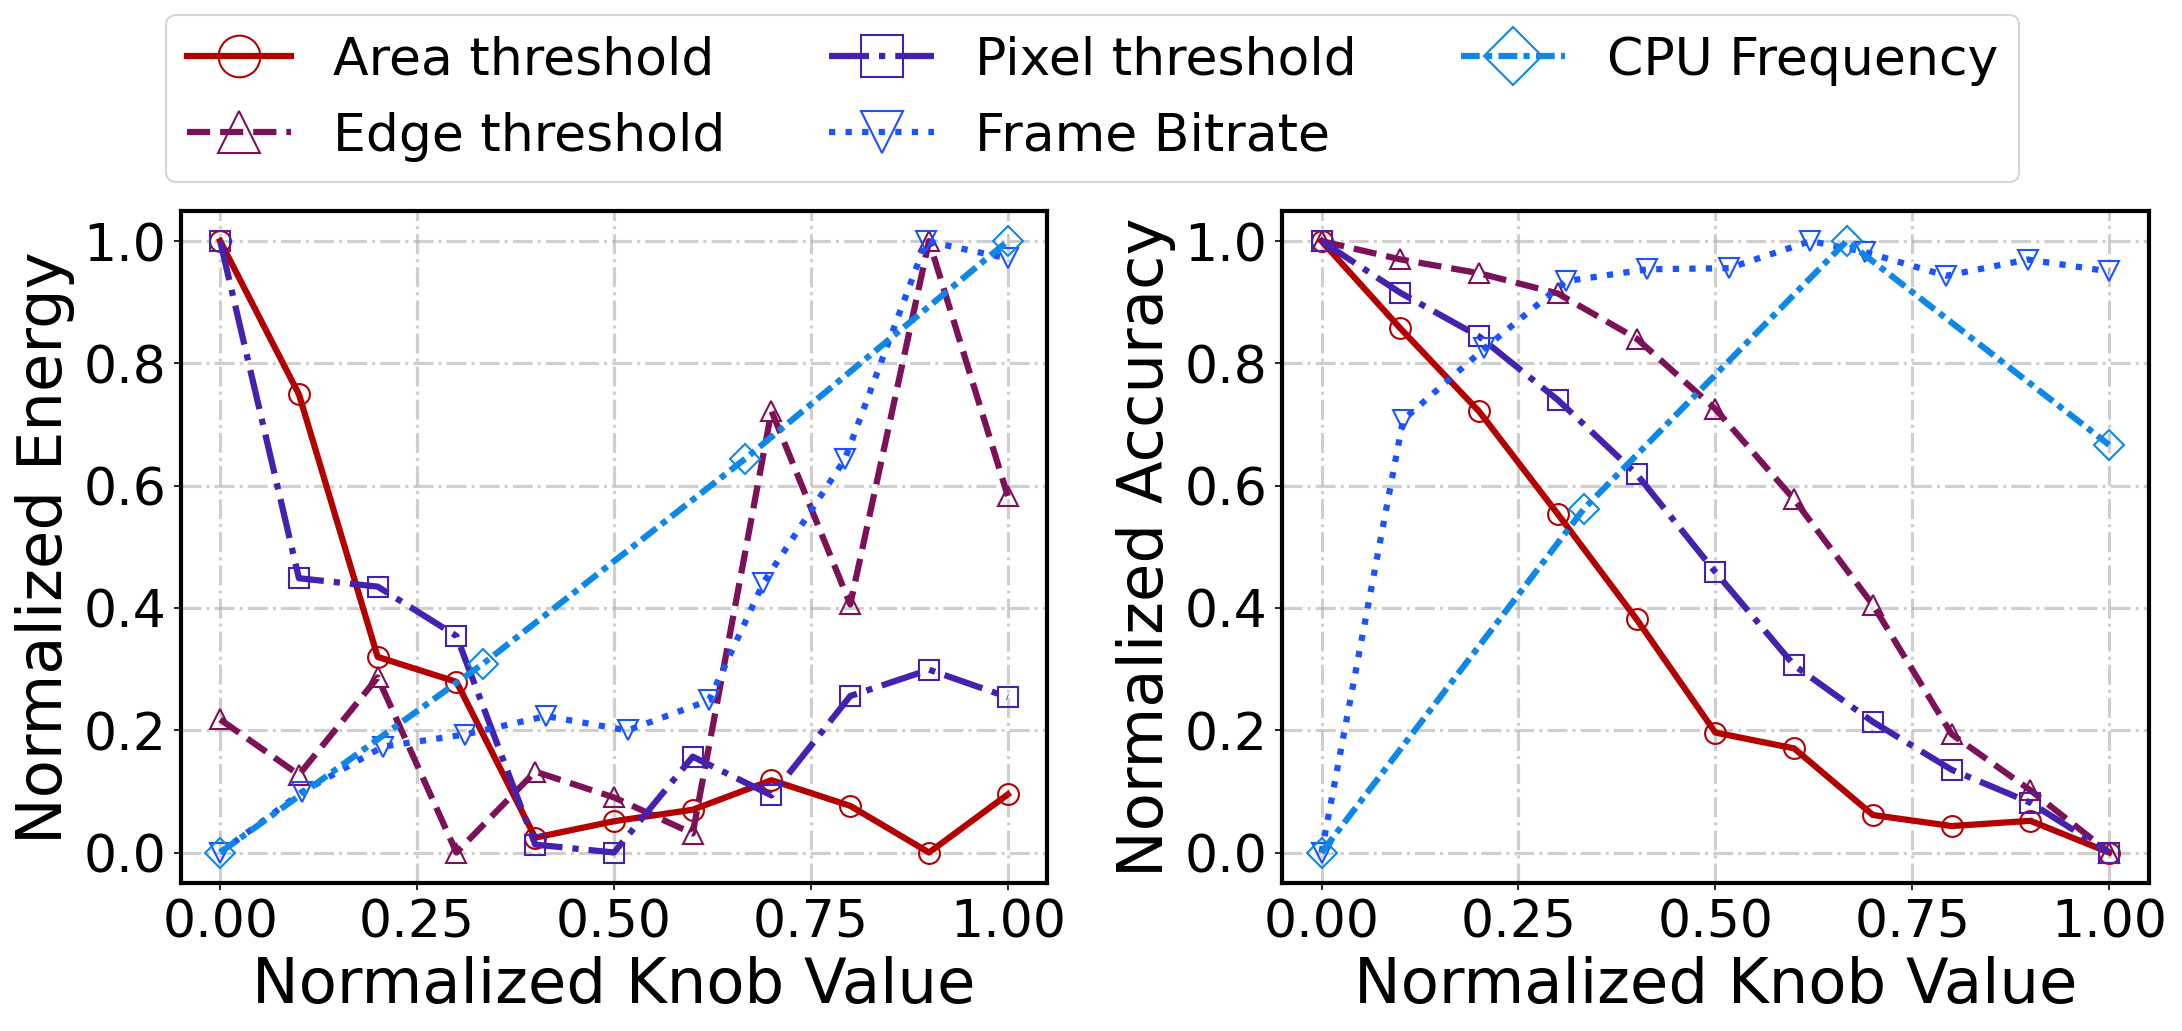

In [61]:
colors = [
    '#1f77b4',  # Blue
    '#ff7f0e',  # Orange
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#8c564b',  # Brown
    '#e377c2',  # Pink
    '#7f7f7f',  # Gray
    '#bcbd22',  # Olive
    '#17becf'   # Teal
]
colors = ["#b30000", "#7c1158", "#4421af", "#1a53ff", "#0d88e6", "#00b7c7", "#5ad45a", "#8be04e", "#ebdc78"]
markers = ['o', '^', 's', 'v', 'D', 'P', '*', 'X', 'p', 'H']
linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 2, 2, 2)), (0, (1, 1)), (0, (4, 2))]
linewidth = 3
markersize = 10
axis_fontsize = 30
tick_fontsize = 25

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# First plot: Energy
for i, (filter, group) in enumerate(merged_df.groupby('Filter')):
    data1 = group[(group['Frame Bitrate'] == 3000) & (group['Frequency'] == 2.4)]
    data1.loc[:, 'Threshold'] = data1['Threshold'] / data1['Threshold'].max()
    data1.loc[:, 'Avg Energy'] = (data1['Avg Energy'] - data1['Avg Energy'].min()) / (data1['Avg Energy'].max() - data1['Avg Energy'].min())
    ax.plot(data1['Threshold'], data1['Avg Energy'], marker=markers[i], label=f'{filter.capitalize()} threshold', color=colors[i], linestyle=linestyles[i], linewidth=linewidth, markersize=markersize, markerfacecolor='none')

data2 = group[(group['Threshold'] == 0.0) & (group['Frequency'] == 2.4)]
data2.loc[:, 'Frame Bitrate'] = (data2['Frame Bitrate'] - data2['Frame Bitrate'].min()) / (data2['Frame Bitrate'].max() - data2['Frame Bitrate'].min())
data2.loc[:, 'Avg Energy'] = (data2['Avg Energy'] - data2['Avg Energy'].min()) / (data2['Avg Energy'].max() - data2['Avg Energy'].min())
ax.plot(data2['Frame Bitrate'], data2['Avg Energy'], marker=markers[3], label='Frame Bitrate', color=colors[3], linestyle=linestyles[3], linewidth=linewidth, markersize=markersize, markerfacecolor='none')

data3 = merged_df[(merged_df['Threshold'] == 0.0) & (merged_df['Frame Bitrate'] == 3000)]
data3 = data3.groupby('Frequency', as_index=False)['Avg Energy'].mean()
data3.loc[:, 'Frequency'] = (data3['Frequency'] - data3['Frequency'].min()) / (data3['Frequency'].max() - data3['Frequency'].min())
data3.loc[:, 'Avg Energy'] = (data3['Avg Energy'] - data3['Avg Energy'].min()) / (data3['Avg Energy'].max() - data3['Avg Energy'].min())
ax.plot(data3['Frequency'], data3['Avg Energy'], marker=markers[4], label='CPU Frequency', color=colors[4], linestyle=linestyles[4], linewidth=linewidth, markersize=markersize, markerfacecolor='none')

ax.set_xlabel('Normalized Knob Value', fontsize=axis_fontsize)
ax.set_ylabel('Normalized Energy', fontsize=axis_fontsize)
ax.tick_params(axis='both', labelsize=tick_fontsize) 
ax.grid(True, linestyle='-.', linewidth=1.5, alpha=0.6)

# Second plot: Accuracy
for i, (filter, group) in enumerate(merged_df.groupby('Filter')):
    data1 = group[(group['Frame Bitrate'] == 3000) & (group['Frequency'] == 2.4)]
    data1.loc[:, 'Threshold'] = data1['Threshold'] / data1['Threshold'].max()
    data1.loc[:, 'Average IoU'] = (data1['Average IoU'] - data1['Average IoU'].min()) / (data1['Average IoU'].max() - data1['Average IoU'].min())
    ax2.plot(data1['Threshold'], data1['Average IoU'], marker=markers[i], color=colors[i], linestyle=linestyles[i], linewidth=linewidth, markersize=markersize, markerfacecolor='none')

data2 = group[(group['Threshold'] == 0.0) & (group['Frequency'] == 2.4)]
data2.loc[:, 'Frame Bitrate'] = (data2['Frame Bitrate'] - data2['Frame Bitrate'].min()) / (data2['Frame Bitrate'].max() - data2['Frame Bitrate'].min())
data2.loc[:, 'Average IoU'] = (data2['Average IoU'] - data2['Average IoU'].min()) / (data2['Average IoU'].max() - data2['Average IoU'].min())
ax2.plot(data2['Frame Bitrate'], data2['Average IoU'], marker=markers[3], color=colors[3], linestyle=linestyles[3], linewidth=linewidth, markersize=markersize, markerfacecolor='none')

data3 = merged_df[(merged_df['Threshold'] == 0.0) & (merged_df['Frame Bitrate'] == 3000)]
data3 = data3.groupby('Frequency', as_index=False)['Average IoU'].mean()
data3.loc[:, 'Frequency'] = (data3['Frequency'] - data3['Frequency'].min()) / (data3['Frequency'].max() - data3['Frequency'].min())
data3.loc[:, 'Average IoU'] = (data3['Average IoU'] - data3['Average IoU'].min()) / (data3['Average IoU'].max() - data3['Average IoU'].min())
ax2.plot(data3['Frequency'], data3['Average IoU'], marker=markers[4], color=colors[4], linestyle=linestyles[4], linewidth=linewidth, markersize=markersize, markerfacecolor='none')

ax2.set_xlabel('Normalized Knob Value', fontsize=axis_fontsize)
ax2.set_ylabel('Normalized Accuracy', fontsize=axis_fontsize)
ax2.tick_params(axis='both', labelsize=tick_fontsize) 
ax2.grid(True, linestyle='-.', linewidth=1.5, alpha=0.6)

fig.legend(fontsize=25, loc='lower center', bbox_to_anchor=(0.5, 0.95), ncol=3, markerscale=2)

plt.tight_layout()
plt.show()

In [62]:
def find_higher_energy_tuples(file1, file2):
    # Load the CSV files into pandas DataFrames
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    
    # Merge data on (frequency, filter, threshold, bitrate) tuples
    merged = df1.merge(df2, on=["Frequency", "Filter", "Threshold", "Frame Bitrate"], suffixes=("_file1", "_file2"))
    
    # Find rows where the energy in file1 is higher than in file2
    higher_energy = merged[merged["Avg Energy_file1"] > merged["Avg Energy_file2"]]
    
    # Select relevant columns
    result = higher_energy[["Frequency", "Filter", "Threshold", "Frame Bitrate", "Avg Energy_file1", "Avg Energy_file2"]]
    
    return result

# Example usage
file1 = "energy-JH-night-1.csv"
file2 = "energy-JH-1.csv"
result_df = find_higher_energy_tuples(file1, file2)
print(result_df[(result_df["Threshold"] > 0.01) & (result_df["Filter"] == 'area') & (result_df["Frequency"] == 2.4)])

      Frequency Filter  Threshold  Frame Bitrate  Avg Energy_file1  \
1232        2.4   area       0.02            100          7.365578   
1233        2.4   area       0.02            400          7.385737   
1234        2.4   area       0.02            700          7.341478   
1235        2.4   area       0.02           1000          7.416984   
1236        2.4   area       0.02           1300          7.368496   
...         ...    ...        ...            ...               ...   
1326        2.4   area       0.10           1900          7.371356   
1327        2.4   area       0.10           2100          7.401698   
1328        2.4   area       0.10           2400          7.386214   
1329        2.4   area       0.10           2700          7.332231   
1330        2.4   area       0.10           3000          7.363690   

      Avg Energy_file2  
1232          7.232966  
1233          7.256862  
1234          7.193362  
1235          7.244516  
1236          7.241354  
...      